In [5]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# create random points for example in latex 

In [12]:
from __future__ import print_function 
import numpy as np 
xmin, xmax = 4.2, 7.8
ymin, ymax = .2, 2.8

N = 20 # number of random points 
x = np.random.rand(N)*(xmax - xmin) + xmin 
y = np.random.rand(N)*(ymax - ymin) + ymin 

for i in range(N):
    print('%.2f/%.2f,' %(x[i], y[i]), end = '')

6.18/1.97,7.55/2.79,4.31/1.52,6.50/1.61,5.77/1.56,5.37/2.36,6.79/0.83,4.28/0.48,5.97/1.69,6.48/1.48,7.03/1.54,6.70/1.32,5.18/2.37,6.19/0.89,6.39/1.27,6.55/2.57,5.64/2.48,4.86/1.87,6.12/0.34,6.37/0.99,

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target 

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
from sklearn.tree import export_graphviz
export_graphviz( tree_clf, out_file = "iris_tree.dot", feature_names = iris.feature_names[2:], \
                class_names = iris.target_names, rounded = True, filled = True)

# entropy function 


In [24]:
p = np.linspace(0.001, 0.999, 1000)
y = -p*np.log(p) - (1-p)*np.log(1-p)

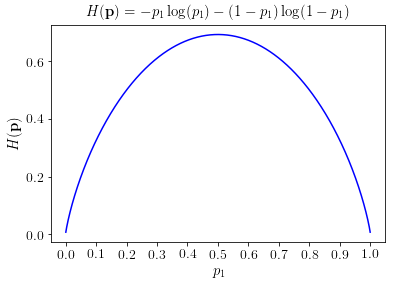

In [44]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
plt.plot(p, y, 'b-')
plt.xlabel('$p_1$', fontsize = 15)
plt.ylabel('$H(\mathbf{p})$', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title('$H(\mathbf{p}) = -p_1 \log(p_1) - (1-p_1)\log(1-p_1)$', fontsize = 15)
filename = 'entropy.pdf'
with PdfPages(filename) as pdf:
    pdf.savefig(bbox_inches='tight')
plt.show()

In [45]:
p1 = 5./14 
H = -p1*np.log(p1) - (1-p1)*np.log(1 - p1)

In [46]:
print(H)

0.651756561173


In [47]:
(4*0.693 + 6*0.637 + 4*0.562)/14

0.6315714285714285

In [58]:


def HxS(S):
    K = S.shape[0]
    C = S.shape[1]
    s = S.sum(axis = 1)

    total = s.sum()
    res = 0 
    for k in range(K):
        tmp = 0 
        for c in range(C):
            p = S[k,c]/float(s[k])
            if p:
                tmp = tmp - p*np.log(p) 
        res += tmp *s[k]/total
    return res 
S_outlook = np.array([[2, 3], [4, 0], [3, 2]])
print(HxS(S_outlook))
S_tmp = np.array([[2, 2], [4, 2], [3, 1]])
print(HxS(S_tmp))
S_hum = np.array([[3, 4], [6, 1]])
print(HxS(S_hum))
S_win = np.array([[6, 2], [3, 3]])
print(HxS(S_win))

0.480722619292
0.631501022177
0.546512211494
0.618397445736


In [2]:
from sklearn.datasets import load_breast_cancer
from id3 import Id3Estimator
from id3 import export_graphviz

bunch = load_breast_cancer()
estimator = Id3Estimator()
estimator.fit(bunch.data, bunch.target)
export_graphviz(estimator.tree_, 'tree.dot', bunch.feature_names)

<closed file 'tree.dot', mode 'wb' at 0x10afa6ae0>

In [47]:
from __future__ import print_function 
import numpy as np 
import pandas as pd 

# Reading user file:
inputs =  ['outlook', 'temperature', 'humidity', 'wind']
output = ['play']
X = pd.read_csv('weather.csv', sep=',', names = inputs)
y = pd.read_csv('weather.csv', sep=',', names = output)

In [56]:
df = pd.DataFrame.from_csv('weather.csv')

In [68]:
for col_name in list(df):
    df[col_name] = df[col_name].astype('category')


In [69]:
cat_columns = df.select_dtypes(['category']).columns
# cat_columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [71]:
X = df.as_matrix()

In [85]:
data = X[:, :-1]
target = X[:, -1]



In [86]:
estimator = Id3Estimator()
estimator.fit(data, target)
export_graphviz(estimator.tree_, 'tree2.dot', bunch.feature_names)

<closed file 'tree2.dot', mode 'wb' at 0x10bad2db0>

In [83]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(data, target)

In [84]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

In [87]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [90]:
X

array([[2, 1, 0, 1, 0],
       [2, 1, 0, 0, 0],
       [0, 1, 0, 1, 1],
       [1, 2, 0, 1, 1],
       [1, 0, 1, 1, 1],
       [1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1],
       [2, 2, 0, 1, 0],
       [2, 0, 1, 1, 1],
       [1, 2, 1, 1, 1],
       [2, 2, 1, 0, 1],
       [0, 2, 0, 0, 1],
       [0, 1, 1, 1, 1],
       [1, 2, 0, 0, 0]], dtype=int8)

My ID3 implementation 

In [293]:
class TreeNode(object):
    def __init__(self, ids = None, children = [], entropy = 0, depth = 0):
        self.ids = ids # index of data in this node 
        self.children = children # list of its child nodes
        self.entropy = entropy # entropy, will fill later 
        self.depth = depth # distanct to root node

def entropy(prob):
    # remove prob 0 
    prob_0 = np.array(prob).nonzero()[0]
    if len(prob_0) == 0: return 0
    return -np.sum(prob_0*np.log(prob_0))
    

In [294]:
class DecisionTreeID3(object):
    def __init__(self, max_depth= 10, min_samples_split = 2, min_gain = 0):
        self.root = TreeNode(depth = 0)
        self.max_depth = max_depth 
        self.min_samples_split = min_samples_split 
        self.Ntrain = 0
        self.min_gain = 0 
    
    def fit(self, data, target):
        self.Ntrain = data.count()[0]
        self.data = data 
        self.attributes = list(data)
        self.target = target 
        self.labels = target.unique()
        
        self.root.ids = range(self.Ntrain)
        queue = [self.root]
        while queue:
            node = queue.pop()
#             if node.depth < self.max_depth:
            node.children = self._split(node)
            queue += node.children 
                
        
                
    def _entropy(self, ids):
        # calculate entropy of a node with index ids
        if len(ids) == 0: return 0 
        prob = y[ids].value_counts()/len(ids)
        return entropy(prob)

    
    def _split(self, node):
        ids = node.ids 
        best_gain = 0
        best_splits = []
        sub_data = self.data.iloc[ids, :]
        for i, att in enumerate(self.attributes):
            values = self.data.iloc[ids, i].unique()
            splits = []
            for val in values: 
                sub_ids = sub_data.index[sub_data[att] == val].tolist()
                sub_ids = [i - 1 for i in sub_ids]
                # print(ids[sub_ids])
                splits.append([ids[sub_id] for sub_id in sub_ids])
            if min(map(len, splits)) < self.min_samples_split: continue 
            HxS = 0 
            for split in splits:
                HxS = len(split)*self._entropy(split)/len(ids)
            gain = node.entropy - HxS 
            if gain < self.min_gain: continue 
            if gain > best_gain:
                best_gain = gain 
                best_splits = splits 

        child_nodes = [TreeNode(ids = split, \
                     entropy = self._entropy(split), depth = node.depth + 1) for split in best_splits]
        return child_nodes


In [295]:
df = pd.DataFrame.from_csv('weather.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
tree = DecisionTreeID3(max_depth = 5, min_samples_split = 2)
tree.fit(X, y)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


In [292]:
tree._split(tree.root)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


[]

In [154]:
df?

In [156]:
X.count()[0]

14

In [157]:
list(X)

['outlook', 'temperature', 'humidity', 'wind']

In [161]:
X.groupby('outlook').nunique()


,outlook,temperature,humidity,wind
outlook,,,,
overcast,1,3,2,2
rainy,1,2,2,2
sunny,1,3,2,2


In [165]:
y.groupby().count()

TypeError: You have to supply one of 'by' and 'level'

In [166]:
y.play.unique()

AttributeError: 'Series' object has no attribute 'play'

In [170]:
y.unique().size

2

In [174]:
y['play'].value_counts()

KeyError: 'play'

In [182]:
y.value_counts()/14


yes    0.642857
no     0.357143
Name: play, dtype: float64

In [219]:
id2 = [1, 2, 3, 4, 5, 6]
X[1:5].groupby('outlook').count()

,temperature,humidity,wind
outlook,,,
overcast,1,1,1
rainy,2,2,2
sunny,1,1,1


In [229]:
X.iloc[id2, :].groupby('outlook').count()

,temperature,humidity,wind
outlook,,,
overcast,2,2,2
rainy,3,3,3
sunny,1,1,1


In [231]:
X.iloc[id2, 0].value_counts().min()

1

In [237]:
y.where(X.iloc[[0, 1, 2], 0] == 'sunny').count()

2

In [239]:
y.where(X.iloc[:, 0] == 'sunny')

['no', 'no', nan, nan, nan, nan, nan, 'no', 'yes', nan, 'yes', nan, nan, nan]

In [241]:
y[2:10].value_counts()

yes    6
no     2
Name: play, dtype: int64

In [276]:
# df.index[df['BoolCol'] == True].tolist()
a = X['outlook'].index[X['outlook'] == 'sunny'].tolist()

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [277]:
aclass DecisionTreeID3(object):
    def __init__(self, max_depth= 10, min_samples_split = 2, min_gain = 0):
        self.root = TreeNode(depth = 0)
        self.max_depth = max_depth 
        self.min_samples_split = min_samples_split 
        self.Ntrain = 0
        self.min_gain = 0 
    
    def fit(self, data, target):
        self.Ntrain = data.count()[0]
        self.data = data 
        self.attributes = list(data)
        self.target = target 
        self.labels = target.unique()
        
        self.root.ids = range(self.Ntrain)
        queue = [self.root]
        while queue:
            node = queue.pop()
            if node.depth < self.max_depth:
                node.children = self._split(node)
                queue += node.children 
                
        
                
    def _entropy(self, ids):
        # calculate entropy of a node with index ids
        if len(ids) == 0: return 0 
        prob = y[ids].value_counts()/len(ids)
        return entropy(prob)

    
    def _split(self, node):
        ids = node.ids 
        best_gain = 0
        best_splits = []
        sub_data = self.data.iloc[ids, :]
        for i, att in enumerate(self.attributes):
            values = self.data.iloc[ids, i].unique()
            splits = []
            for val in values: 
                sub_ids = sub_data.index[sub_data[att] == val].tolist()
                sub_ids = [i - 1 for i in sub_ids]
                # print(ids[sub_ids])
                splits.append([ids[sub_id] for sub_id in sub_ids])
            if min(map(len, splits)) < self.min_samples_split: continue 
            HxS = 0 
            for split in splits:
                HxS = len(split)*self._entropy(split)/len(ids)
            gain = node.entropy - HxS 
            if gain < self.min_gain: continue 
            if gain > best_gain:
                best_gain = gain 
                best_splits = splits 

        child_nodes = [TreeNode(ids = split, \
                     entropy = self._entropy(split), depth = node.depth + 1) for split in best_splits]
        return child_nodes


SyntaxError: invalid syntax (<ipython-input-277-1c7a68e015ff>, line 1)

In [278]:
y.unique()

array(['no', 'yes'], dtype=object)

In [279]:
ss = [[1, 2], [3, 4], [5, 6, 7]]
min(map(len, ss))

2

In [280]:
min(len(a) for a in ss)

2

In [261]:
X.count()[0]

14

In [268]:
a = [1, 2, 3]
a.pop()

3

In [300]:
np.array(y.value_counts())

array([9, 5])

In [301]:
ids = range(14)

In [302]:
y.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [303]:
y.value_counts().tolist()

[9, 5]

In [304]:
prob = np.array(y[ids].value_counts().tolist())/float(len(ids))

In [305]:
prob

array([ 0.64285714,  0.28571429])

In [306]:
y[ids].value_counts().tolist()

[9, 4]

In [309]:
prob = np.array(y[ids].value_counts())

In [312]:
prob/float(prob.sum())

array([ 0.69230769,  0.30769231])

In [314]:
def entropy(freq):
    # remove prob 0 
    freq_0 = freq[np.array(freq).nonzero()[0]]
    prob_0 = freq_0/float(freq_0.sum())
    # print(freq, freq_0, prob_0)
    return -np.sum(prob_0*np.log(prob_0))

print(entropy(np.array([2, 3])))

0.673011667009


In [317]:
X.iloc[0, :]


outlook        sunny
temperature      hot
humidity        high
wind            weak
Name: 1, dtype: object

In [321]:
X.iloc[[3, 4, 5, 9, 13], 0]

id
4     rainy
5     rainy
6     rainy
10    rainy
14    rainy
Name: outlook, dtype: object

In [325]:
a = y.value_counts()

In [326]:
a.max()

9

In [327]:
y.mode()

0    yes
dtype: object

In [331]:
y[:3].mode()[0]

'no'

In [333]:
X.iloc[0, :]


outlook        sunny
temperature      hot
humidity        high
wind            weak
Name: 1, dtype: object

In [334]:
a = X.iloc[0, :]

In [335]:
a['outlook']

'sunny'

In [336]:
a = ['1', '2', '3']
a.index('2')

1

In [337]:
y.mode()

0    yes
dtype: object

In [338]:
y.mode()[0]

'yes'